# Applying Gaussian filters to the STFT of a sound signal

In [1]:
import Pkg
Pkg.activate("..")
import WCA1
using WCA1

 Activating environment at `/mnt/data/L2S/myWCA1/Project.toml`


## Synthetic Linear Chirp

In [2]:
include("../tests/signals.jl")
include("../tests/utils.jl")

# generate lienar chirp
fs = 16000 #Hz
duration = 2 #seconds
x = linear_chirp(fs, duration)
play_audio(x, fs)

PyObject <IPython.lib.display.Audio object>

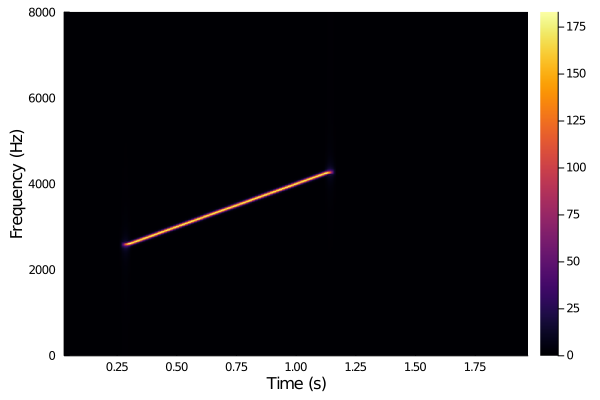

In [3]:
# calculate and plot spectrum
X = stft(x, 1000, 900; fs=fs, window=WCA1.hanning)
plot_heatmap(abs.(X.stft); time=X.time, freq=X.freq)

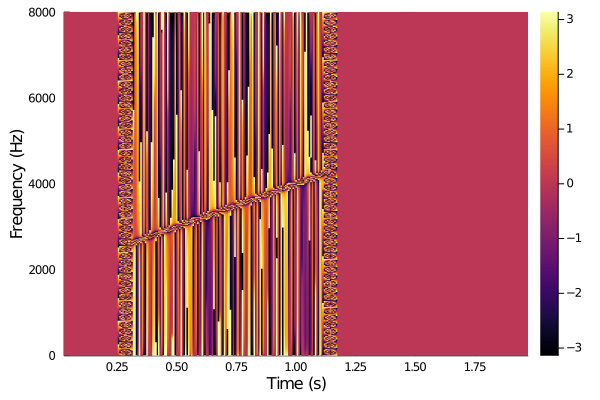

In [4]:
# plot stft phase
plot_heatmap(angle.(X.stft); time=X.time, freq=X.freq)

In [5]:
?stft_filter

search: stft_filter



```
stft_filter(S::Matrix{Complex}, kernel=Kernel.gaussian(3); mode="spectrum")
```

Applies filter using `ImageFiltering.imfilter` on STFT matrix using given kernel. Returns Matrix{Complex}. Provides 3 modes of computation:

  * **spectrum:** filters the spectrum and leaves the phase unchanged (default mode).
  * **polar:** applies the filter on the spectrum and on the phase separately.
  * **cartesian:** applies the filter on the real part and imaginary part separately.

Throws warning otherwise and returns the input STFT.

---

```
stft_filter(S::STFT, kernel=Kernel.gaussian(3); mode="spectrum")
```

Applies filter using `ImageFiltering.imfilter` on STFT matrix using given kernel. Returns STFT object.


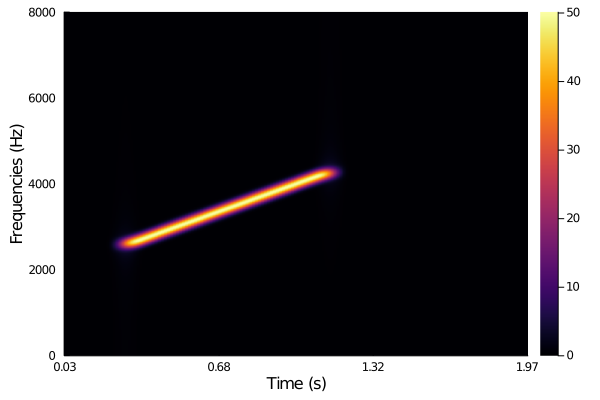

In [6]:
using ImageFiltering

Y = stft_filter(X, Kernel.gaussian(5); mode="spectrum")
show_stft(Y)

Let's compare with different filtering modes.

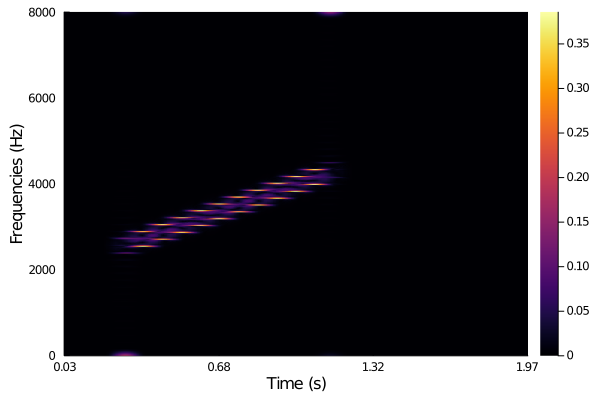

In [7]:
Yc = stft_filter(X, Kernel.gaussian(5); mode="cartesian")
show_stft(Yc)

Let's see how the phase is affected

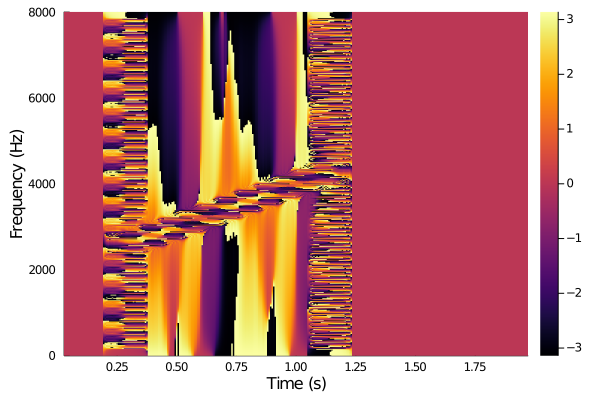

In [8]:
plot_heatmap(angle.(Yc.stft); time=X.time, freq=X.freq)

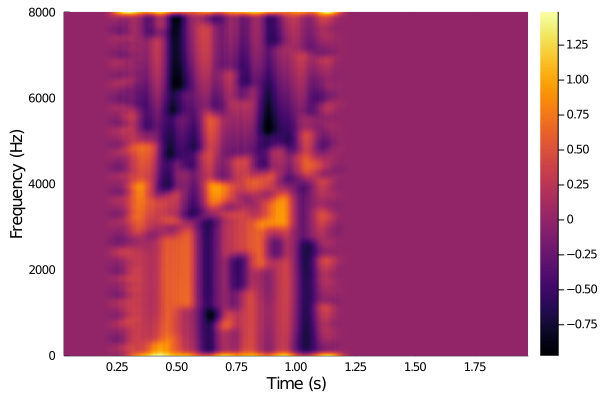

In [9]:
Yp = stft_filter(X, Kernel.gaussian(5); mode="polar")
plot_heatmap(angle.(Yp.stft); time=X.time, freq=X.freq)

Now that we have seen the different spectrums and phases,
let's see how the sound signal is affected with the help of the inverse STFT.

In [10]:
play_audio(istft(Y), fs) # spectrum filtering

PyObject <IPython.lib.display.Audio object>

In [11]:
play_audio(istft(Yc), fs) # cartesian filtering

PyObject <IPython.lib.display.Audio object>

In [12]:
play_audio(istft(Yp), fs) # polar filtering

PyObject <IPython.lib.display.Audio object>

Spectrum filtering with time step of 0.03215434083601286 seconds


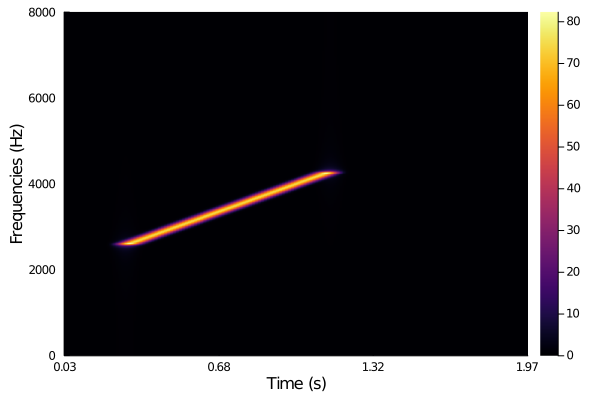

In [17]:
# filtering across time in spectrum mode
dt = duration / size(Y, 2)
Y = stft_filter(X, Kernel.gaussian((0, 5)); mode="spectrum")
println("Spectrum filtering with time step of $(dt * 5) seconds")
show_stft(Y)

In [18]:
play_audio(istft(Y), fs)

PyObject <IPython.lib.display.Audio object>

Spectrum filtering with frequency step of 79.84031936127744


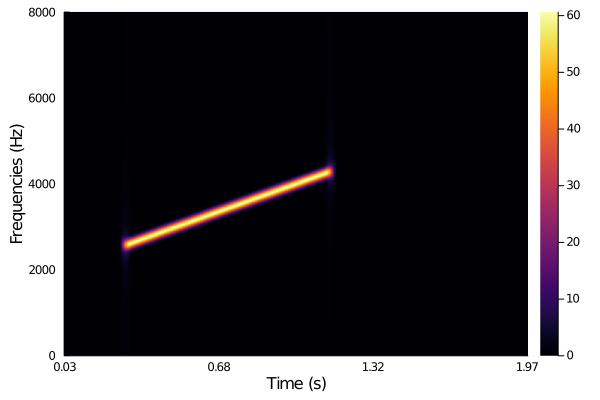

In [15]:
# filtering across time in spectrum mode
dw = last(Y.freq) / size(Y, 1)
Y = stft_filter(X, Kernel.gaussian((5, 0)); mode="spectrum")
println("Spectrum filtering with frequency step of $(dw * 5) hertz")
show_stft(Y)

In [19]:
play_audio(istft(Y), fs)

PyObject <IPython.lib.display.Audio object>

## Recorded speech signal

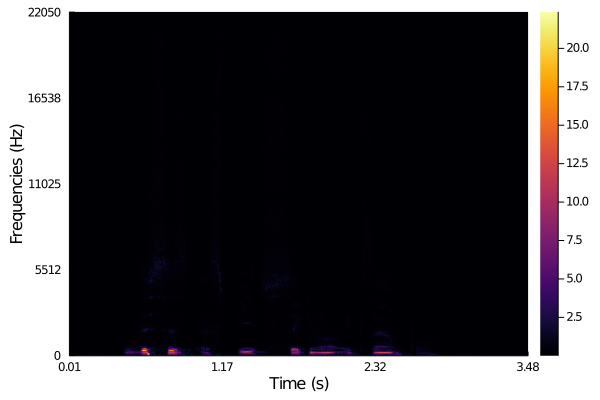

In [20]:
import WAV
x, fs = WAV.wavread("../samples/speech_signal_example.wav")
x = reshape(x, length(x))

X = stft(x, 1000, 900; fs=fs, window=WCA1.hanning)
show_stft(X)

In [21]:
play_audio(x, fs)

PyObject <IPython.lib.display.Audio object>

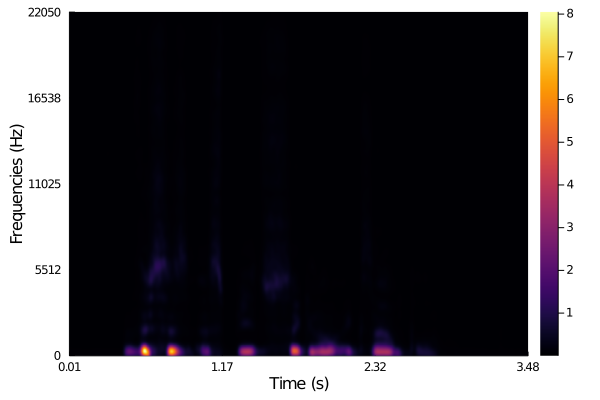

In [22]:
Y = stft_filter(X, Kernel.gaussian(5); mode="spectrum")
show_stft(Y)

In [23]:
y = istft(Y)
play_audio(y, fs)

PyObject <IPython.lib.display.Audio object>

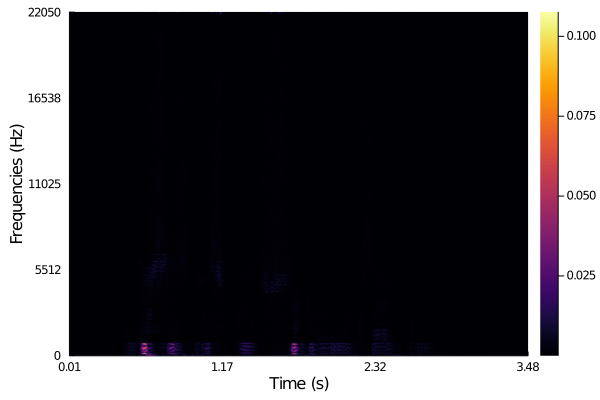

In [31]:
Y = stft_filter(X, Kernel.gaussian(3); mode="cartesian")
show_stft(Y)

In [32]:
y = istft(Y)
play_audio(y, fs)

PyObject <IPython.lib.display.Audio object>

In [34]:
play_audio(istft(stft_filter(X, Kernel.gaussian(3); mode="polar")), fs)

PyObject <IPython.lib.display.Audio object>

In [37]:
dt = length(x) / (fs * size(X, 2))
println("Spectrum filtering with time step of $(dt * 5) seconds")
play_audio(istft(stft_filter(X, Kernel.gaussian((0, 5)); mode="spectrum")), fs)

Spectrum filtering with time step of 0.011411183 seconds


PyObject <IPython.lib.display.Audio object>

In [38]:
dw = last(X.freq) / size(X, 1)
println("Spectrum filtering with frequency step of $(dw * 5) hertz")
play_audio(istft(stft_filter(X, Kernel.gaussian((5, 0)); mode="spectrum")), fs)

Spectrum filtering with frequency step of 220.05988 hertz


PyObject <IPython.lib.display.Audio object>